# Introduction to network analyses

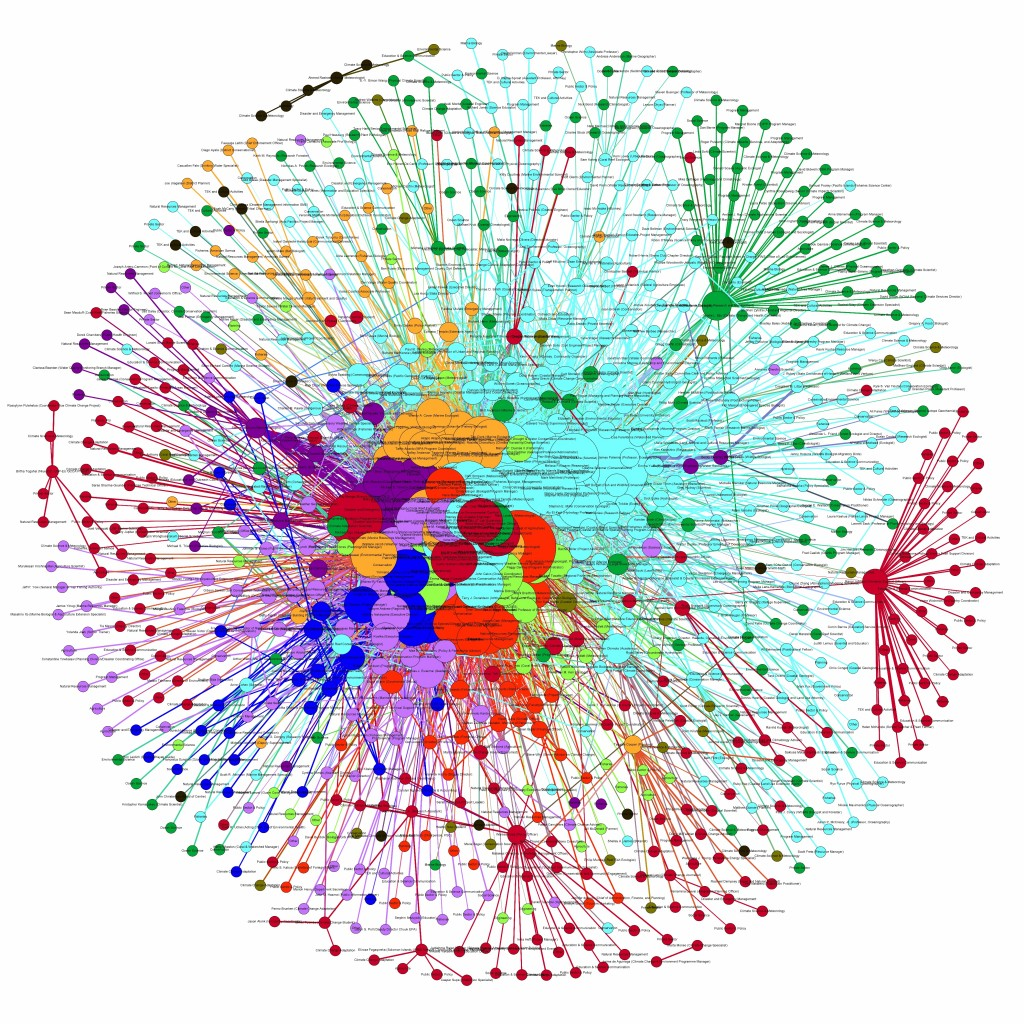

In [ ]:
# TODO -> move to utils
def display_centrality_result(centrality_type, centrality_values):
    print("%s Centrailities for Nodes : \n" %(centrality_type, ))
    for (node, value) in centrality_values.items():
        print("%12s : %.4f" %(node, round(value, 4),))
        

def display_centrality_graph(graph, centrality_values, new_range_max=10000, new_range_min=300):
    node_sizes = [v for (n, v) in centrality_values.items()]

    new_range = new_range_max - new_range_min
    old_range_min = min(node_sizes)
    old_range_max = max(node_sizes)
    old_range = old_range_max - old_range_min
    node_sizes = [(new_range_min + (((v - old_range_min) / old_range) * new_range)) for v in node_sizes]

    plt.figure(figsize=(15, 9))
    plt.axis("off")
    nx.draw_networkx(G=graph, node_size=node_sizes, node_color='g', font_color='k', alpha=0.9)
    plt.show()

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-importance-of-beeing-central:-The-Medici" data-toc-modified-id="The-importance-of-beeing-central:-The-Medici-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The importance of beeing central: The Medici</a></span><ul class="toc-item"><li><span><a href="#Degree-centrality" data-toc-modified-id="Degree-centrality-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Degree centrality</a></span></li><li><span><a href="#Closeness-centrality" data-toc-modified-id="Closeness-centrality-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Closeness centrality</a></span></li><li><span><a href="#Eigenvector-centrality" data-toc-modified-id="Eigenvector-centrality-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Eigenvector centrality</a></span></li><li><span><a href="#Betweenness-centrality" data-toc-modified-id="Betweenness-centrality-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Betweenness centrality</a></span></li></ul></li><li><span><a href="#Detecting-communities:-The-Zackary-Karate-Club" data-toc-modified-id="Detecting-communities:-The-Zackary-Karate-Club-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Detecting communities: The Zackary Karate Club</a></span></li><li><span><a href="#Game-of-Thrones-Network" data-toc-modified-id="Game-of-Thrones-Network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Game of Thrones Network</a></span><ul class="toc-item"><li><span><a href="#GOT-recommender-system" data-toc-modified-id="GOT-recommender-system-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>GOT-recommender system</a></span></li></ul></li></ul></div>

In [140]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf # welcome!!
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)

In [141]:
%%capture
!pip install networkx

In [142]:
# Let´s welcome a new library!
import networkx as nx

# Table of Contents

## The importance of beeing central: The Medici

We analyse the network of marriage links between the main Florentine families. Two families were in conflict: the Medici and the Strozzi. Power and money were the reasons. The Medici family did not have greatest wealth or most seats in the legislature, yet it rose to power. Through marriages, the Medici family had a position of centrality in the social network, crucial for communication, brokering deals, etc.


You can read more about the rise of the Medici in the original paper from Padgett: Padgett, John F. 1994. Marriage and Elite Structure in Renaissance Florence, 1282-1500. Paper delivered to the Social Science History Association.

In [143]:
G = nx.florentine_families_graph()


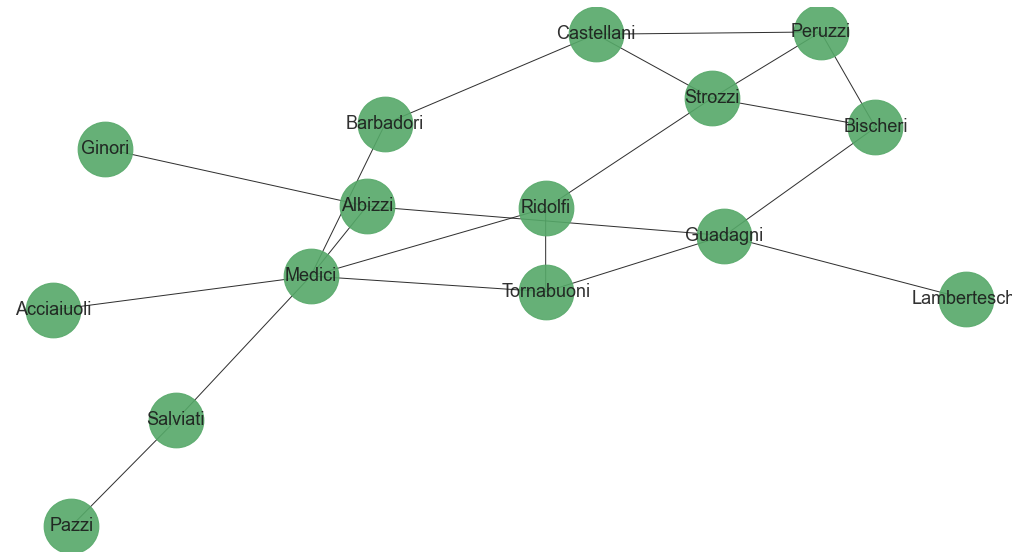

In [153]:
# Plot the network
plt.figure(figsize=(18, 10))
plt.axis("off")
nx.draw_networkx(G=G, node_size=3000, 
                 node_color='g', 
                 font_color='k', 
                 alpha=0.9,
                 font_size=18)
plt.show()

### Degree centrality

Historically first and conceptually simplest is degree centrality, which is defined as the number of links incident upon a node (i.e., the number of ties that a node has)

NOTE: all definitions of centrality are taken from [Wikipedia](https://en.wikipedia.org/wiki/Centrality#Degree_centrality)

In [154]:
deg_centrality_dict = nx.degree_centrality(G)
display_centrality_result(centrality_type="Degree", 
                          centrality_values=deg_centrality_dict)

Degree Centrailities for Nodes : 

  Acciaiuoli : 0.0714
      Medici : 0.4286
  Castellani : 0.2143
     Peruzzi : 0.2143
     Strozzi : 0.2857
   Barbadori : 0.1429
     Ridolfi : 0.2143
  Tornabuoni : 0.2143
     Albizzi : 0.2143
    Salviati : 0.1429
       Pazzi : 0.0714
    Bischeri : 0.2143
    Guadagni : 0.2857
      Ginori : 0.0714
Lamberteschi : 0.0714


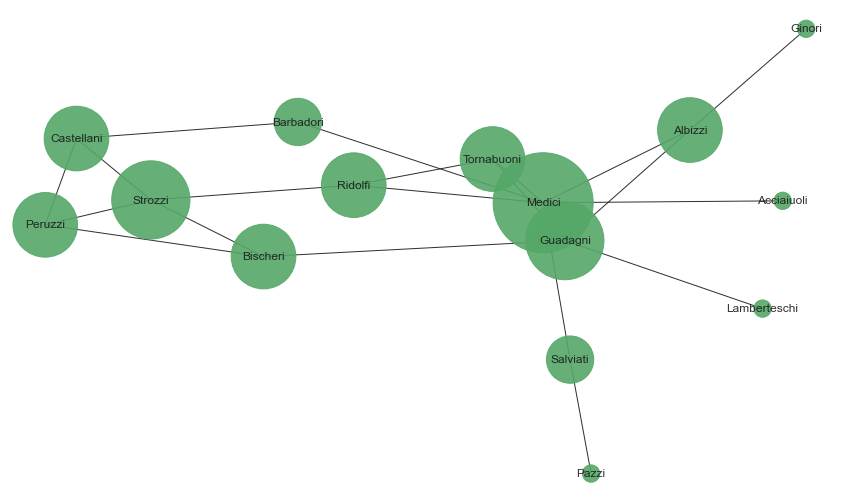

In [155]:
display_centrality_graph(graph=G, centrality_values=deg_centrality_dict)

### Closeness centrality

In a connected graph, the normalized closeness centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.

$$C(x)= \frac{1}{\sum_y d(y,x)}$$

In [156]:
closeness_centrality_dict = nx.closeness_centrality(G)
display_centrality_result(centrality_type="Closeness", 
                          centrality_values=closeness_centrality_dict)

Closeness Centrailities for Nodes : 

  Acciaiuoli : 0.3684
      Medici : 0.5600
  Castellani : 0.3889
     Peruzzi : 0.3684
     Strozzi : 0.4375
   Barbadori : 0.4375
     Ridolfi : 0.5000
  Tornabuoni : 0.4828
     Albizzi : 0.4828
    Salviati : 0.3889
       Pazzi : 0.2857
    Bischeri : 0.4000
    Guadagni : 0.4667
      Ginori : 0.3333
Lamberteschi : 0.3256


Curious on how to actually compute the shortest distance between two nodes? Take a look at this video explaining a famous algorithm to calculate it! The [Dijkstra´s algorithm](https://www.youtube.com/watch?v=GazC3A4OQTE&t=550s)

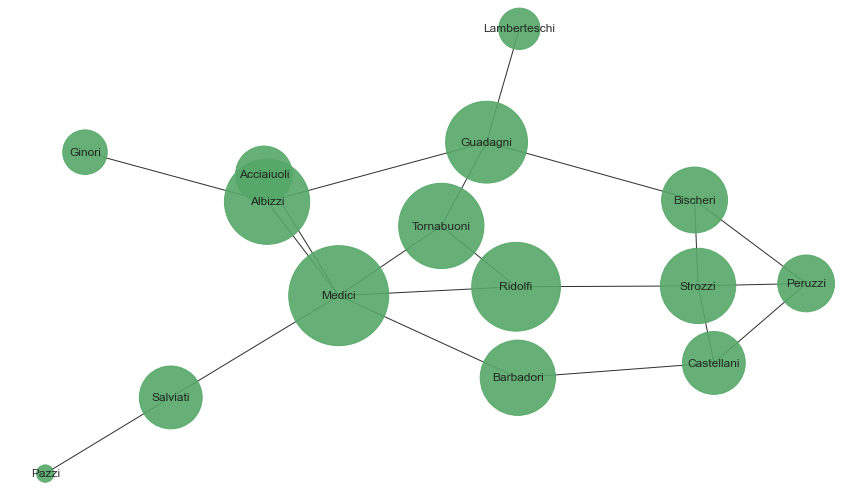

In [157]:
display_centrality_graph(graph=G, centrality_values=closeness_centrality_dict)

### Eigenvector centrality

Eigenvector centrality (also called eigencentrality) is a measure of the influence of a node in a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. Google's PageRank and the Katz centrality are variants of the eigenvector centrality.

For a given graph $G:=(V,E)$ with $|V|$ number of vertices let $A = (a_{v,t})$ be the [[adjacency matrix]], i.e. $a_{v,t} = 1$ if vertex $v$ is linked to vertex $t$, and $a_{v,t} = 0$ otherwise. The relative centrality score of vertex $v$ can be defined:

$$x_v = \frac{1}{\lambda} \sum_{t \in M(v)}x_t = \frac{1}{\lambda} \sum_{t \in G} a_{v,t}x_t$$

where $M(v)$ is a set of the neighbors of $v$ and $\lambda$ is a constant. With a small rearrangement this can be rewritten in vector notation as the eigenvector equation

$$\mathbf{Ax} = {\lambda}\mathbf{x}$$

In [159]:
eigenv_centrality_dict = nx.eigenvector_centrality(G)
display_centrality_result(centrality_type="Eigenvector", 
                           centrality_values=eigenv_centrality_dict)

Eigenvector Centrailities for Nodes : 

  Acciaiuoli : 0.1322
      Medici : 0.4303
  Castellani : 0.2590
     Peruzzi : 0.2757
     Strozzi : 0.3560
   Barbadori : 0.2117
     Ridolfi : 0.3416
  Tornabuoni : 0.3258
     Albizzi : 0.2440
    Salviati : 0.1459
       Pazzi : 0.0448
    Bischeri : 0.2828
    Guadagni : 0.2891
      Ginori : 0.0749
Lamberteschi : 0.0888


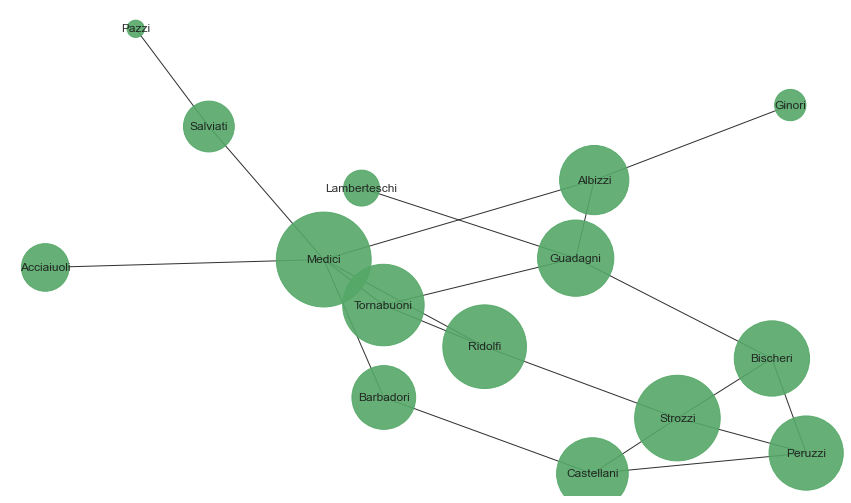

In [160]:
display_centrality_graph(graph=G, centrality_values=eigenv_centrality_dict, 
                         new_range_max=9000)

### Betweenness centrality

Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. 

The betweenness of a vertex <math>v</math> in a graph <math>G:=(V,E)</math> with <math>V</math> vertices is computed as follows:

* For each pair of vertices $(s,t)$, compute the shortest paths between them.
* For each pair of vertices $(s,t)$, determine the fraction of shortest paths that pass through the vertex in question (here, vertex $v$).
* Sum this fraction over all pairs of vertices $(s,t)$.

In [161]:
betweenness_centrality_dict = nx.betweenness_centrality(G)
display_centrality_result(centrality_type="Betweenness", 
                          centrality_values=betweenness_centrality_dict)

Betweenness Centrailities for Nodes : 

  Acciaiuoli : 0.0000
      Medici : 0.5220
  Castellani : 0.0549
     Peruzzi : 0.0220
     Strozzi : 0.1026
   Barbadori : 0.0934
     Ridolfi : 0.1136
  Tornabuoni : 0.0916
     Albizzi : 0.2125
    Salviati : 0.1429
       Pazzi : 0.0000
    Bischeri : 0.1044
    Guadagni : 0.2546
      Ginori : 0.0000
Lamberteschi : 0.0000


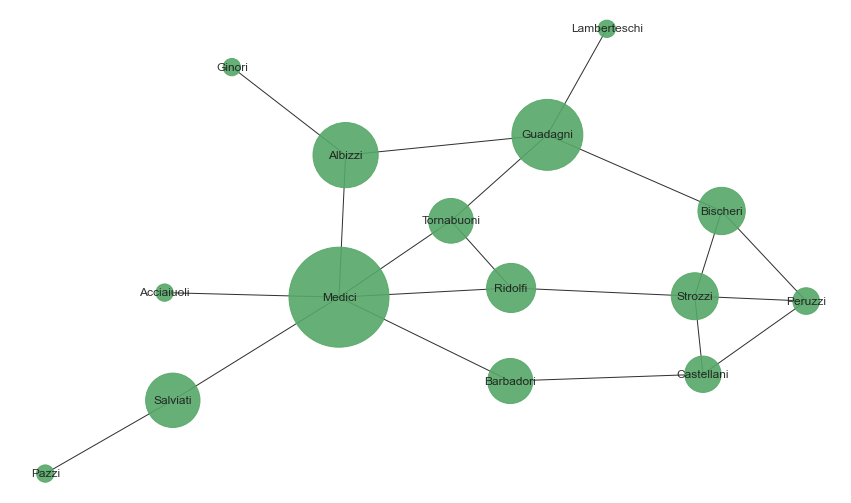

In [162]:
display_centrality_graph(graph=G, 
                         centrality_values=betweenness_centrality_dict)

## Detecting communities: The Zackary Karate Club

A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.


In [163]:
G = nx.karate_club_graph()

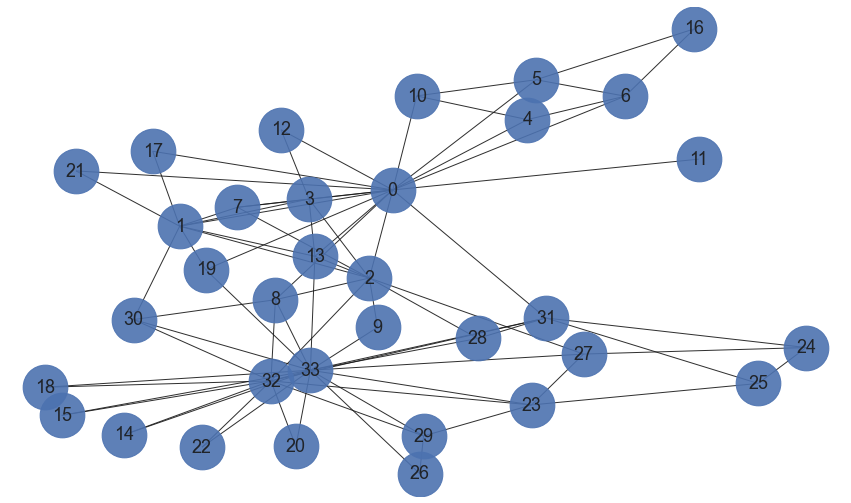

In [164]:
# Plot the network
plt.figure(figsize=(15, 9))
plt.axis("off")
pos=nx.spring_layout(G)
nx.draw_networkx(G=G, pos=pos ,node_size=2000, node_color='b', 
                 font_color='k', alpha=0.9, font_size=18)


The Girvan–Newman algorithm detects communities by progressively removing edges from the original network. The connected components of the remaining network are the communities. Instead of trying to construct a measure that tells us which edges are the most central to communities, the Girvan–Newman algorithm focuses on edges that are most likely "between" communities.

The algorithm's steps for community detection are summarized below

* The betweenness of all existing edges in the network is calculated first.
* The edge(s) with the highest betweenness are removed.
* The betweenness of all edges affected by the removal is recalculated.
* Steps 2 and 3 are repeated until no edges remain.

In [165]:
from networkx.algorithms.community.centrality import girvan_newman

In [181]:
k = 2
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    
    print(tuple(sorted(c) for c in communities))

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])
([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [9])


In [182]:
communities

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21},
 {2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33},
 {9})

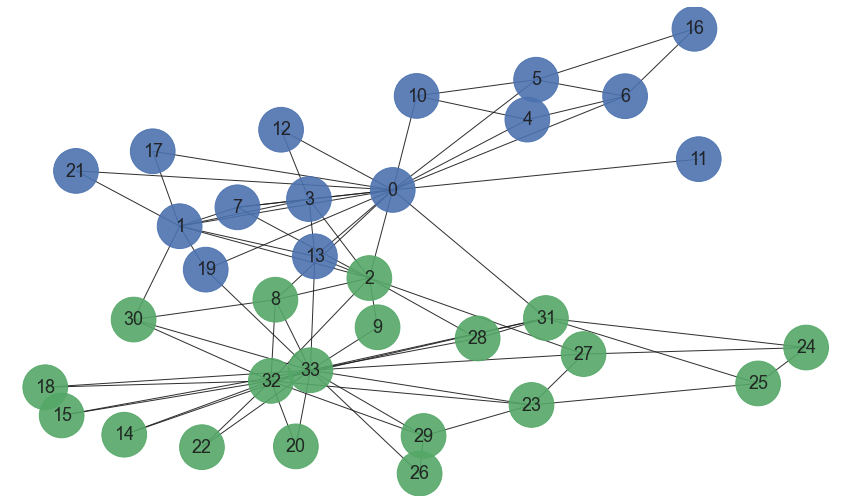

In [183]:
plt.figure(figsize=(15, 9))
plt.axis("off")
node_colors = ['b' if (n in communities[0]) else 'g' for n in G.nodes() ]
nx.draw_networkx(G=G, pos=pos,node_size=2000, node_color=node_colors, 
                 font_color='k', alpha=0.9, font_size=18)


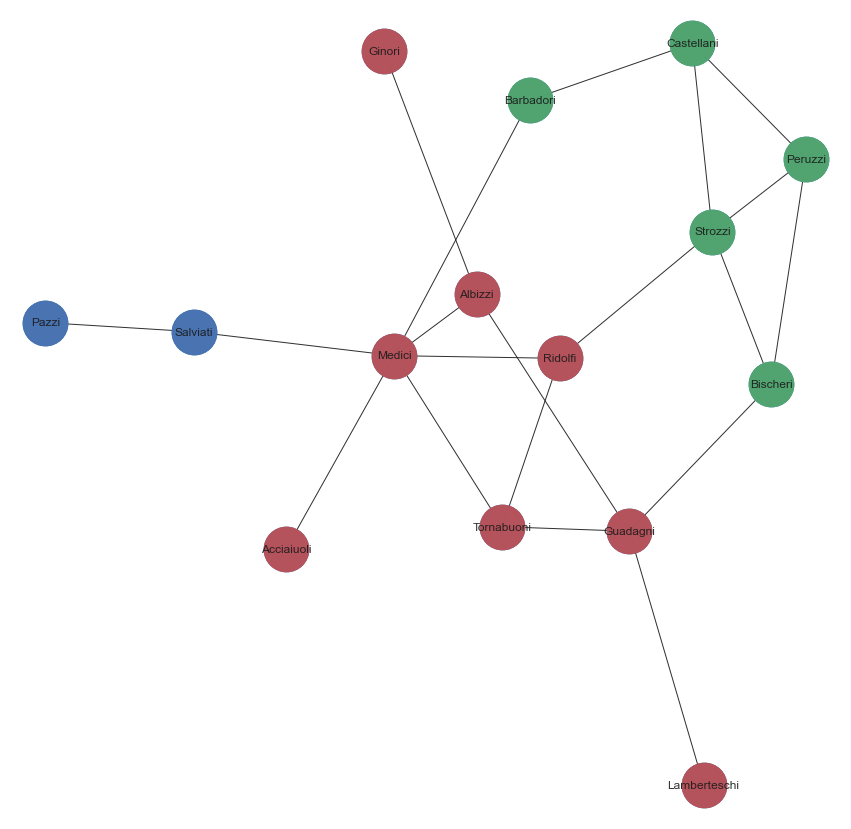

In [189]:
# Back to the Medici
k = 2
G = nx.florentine_families_graph()
pos=nx.spring_layout(G)
comp = girvan_newman(G)
for communities in itertools.islice(comp, k):
    tuple(sorted(c) for c in communities)

plt.figure(figsize=(15, 15))
plt.axis("off")
# Draw the graph, but don't color the nodes
params = {'G':G, 'pos':pos,'node_size':2000, 'alpha':0.9,  }
nx.draw_networkx(**params, font_color='k', font_size=12)


colors = ['r','g', 'b', 'y', 'orange', 'purple']

#For each community list, draw the nodes, giving it a specific color.
for x in range(len(communities)):
    nx.draw_networkx_nodes(**params, nodelist=communities[x], node_color=colors[x])


plt.show()


## Game of Thrones Network

Data and original idea are taken from this [blog entry](https://networkofthrones.wordpress.com/)

In [202]:
got_data = pd.read_csv('../datasets/GOT-edges.csv')

In [203]:
got_data

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3
...,...,...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,Undirected,2818,4
2819,Waymar-Royce,Will-(prologue),Undirected,2819,18
2820,Weasel,Weese,Undirected,2820,6
2821,Woth,Yoren,Undirected,2821,4


In [204]:
got_data.drop(['Type', 'id', 'weight'], axis=1, inplace=True)

In [205]:
got_data

,Source,Target
0,Addam-Marbrand,Brynden-Tully
1,Addam-Marbrand,Cersei-Lannister
2,Addam-Marbrand,Gyles-Rosby
3,Addam-Marbrand,Jaime-Lannister
4,Addam-Marbrand,Jalabhar-Xho
...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke
2819,Waymar-Royce,Will-(prologue)
2820,Weasel,Weese
2821,Woth,Yoren


In [206]:
G = nx.from_pandas_edgelist(got_data,  source='Source', target='Target')

In [224]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 796
Number of edges: 2823
Average degree:   7.0930


In [207]:
nx.average_shortest_path_length(G)

3.416225783003066

In [208]:
nx.diameter(G)

9

In [210]:
nx.average_clustering(G)

0.48586220733504853

In [211]:
deg_centrality_dict = nx.degree_centrality(G)
display_centrality_result(centrality_type="Degree", 
                          centrality_values=deg_centrality_dict)

Degree Centrailities for Nodes : 

Addam-Marbrand : 0.0151
Brynden-Tully : 0.0239
Cersei-Lannister : 0.1220
 Gyles-Rosby : 0.0226
Jaime-Lannister : 0.1270
Jalabhar-Xho : 0.0063
Joffrey-Baratheon : 0.0868
Kevan-Lannister : 0.0214
Lyle-Crakehall : 0.0063
Oberyn-Martell : 0.0252
Tyrion-Lannister : 0.1535
Tywin-Lannister : 0.0604
       Varys : 0.0428
Aegon-Frey-(son-of-Stevron) : 0.0050
Catelyn-Stark : 0.0943
  Robb-Stark : 0.0931
Stevron-Frey : 0.0063
 Walder-Frey : 0.0239
Aegon-I-Targaryen : 0.0113
Daenerys-Targaryen : 0.0918
Eddard-Stark : 0.0931
Harren-Hoare : 0.0038
         Nan : 0.0101
Rhaenys-Targaryen : 0.0025
Stannis-Baratheon : 0.1119
Torrhen-Stark : 0.0025
Visenya-Targaryen : 0.0025
Aegon-Targaryen-(son-of-Rhaegar) : 0.0189
Elia-Martell : 0.0113
Franklyn-Flowers : 0.0038
      Haldon : 0.0138
Harry-Strickland : 0.0038
Jon-Connington : 0.0201
      Lemore : 0.0088
Rhaegar-Targaryen : 0.0226
Rhaenys-Targaryen-(daughter-of-Rhaegar) : 0.0013
Rolly-Duckfield : 0.0101
Viserys-Targar

In [214]:
# degree_centrality
dict(sorted(deg_centrality_dict.items(), key=lambda item: item[1], reverse=True))

{'Tyrion-Lannister': 0.15345911949685534,
 'Jon-Snow': 0.14339622641509434,
 'Jaime-Lannister': 0.1270440251572327,
 'Cersei-Lannister': 0.1220125786163522,
 'Stannis-Baratheon': 0.11194968553459118,
 'Arya-Stark': 0.10566037735849056,
 'Catelyn-Stark': 0.09433962264150943,
 'Sansa-Stark': 0.09433962264150943,
 'Robb-Stark': 0.0930817610062893,
 'Eddard-Stark': 0.0930817610062893,
 'Daenerys-Targaryen': 0.09182389937106918,
 'Joffrey-Baratheon': 0.08679245283018867,
 'Theon-Greyjoy': 0.0830188679245283,
 'Robert-Baratheon': 0.08176100628930817,
 'Bran-Stark': 0.06792452830188679,
 'Tywin-Lannister': 0.06037735849056604,
 'Petyr-Baelish': 0.059119496855345906,
 'Brienne-of-Tarth': 0.056603773584905655,
 'Samwell-Tarly': 0.05534591194968553,
 'Barristan-Selmy': 0.05157232704402515,
 'Renly-Baratheon': 0.047798742138364776,
 'Sandor-Clegane': 0.045283018867924525,
 'Varys': 0.042767295597484274,
 'Mance-Rayder': 0.04150943396226415,
 'Davos-Seaworth': 0.04150943396226415,
 'Gregor-Clegane

In [216]:
betweenness_centrality_dict = nx.betweenness_centrality(G)
dict(sorted(betweenness_centrality_dict.items(), key=lambda item: item[1], reverse=True))

{'Jon-Snow': 0.1921196196835449,
 'Tyrion-Lannister': 0.1621910961115984,
 'Daenerys-Targaryen': 0.11841801916269204,
 'Theon-Greyjoy': 0.11128331813470228,
 'Stannis-Baratheon': 0.11013955266679566,
 'Jaime-Lannister': 0.10083800602581632,
 'Cersei-Lannister': 0.08870426655860289,
 'Arya-Stark': 0.08724236063571153,
 'Eddard-Stark': 0.07873239257251873,
 'Robert-Baratheon': 0.07822769060383258,
 'Robb-Stark': 0.06646842683586629,
 'Catelyn-Stark': 0.054973667953404186,
 'Sansa-Stark': 0.04869098175180615,
 'Barristan-Selmy': 0.045549578315223826,
 'Bran-Stark': 0.04491117872765179,
 'Samwell-Tarly': 0.041466203660771125,
 'Victarion-Greyjoy': 0.03645073716796517,
 'Asha-Greyjoy': 0.03302475436760232,
 'Brienne-of-Tarth': 0.032251918885194235,
 'Joffrey-Baratheon': 0.03175872220136575,
 'Petyr-Baelish': 0.02589858342955331,
 'Davos-Seaworth': 0.023846811266965424,
 'Tywin-Lannister': 0.020669858406317167,
 'Myrcella-Baratheon': 0.020192886619454075,
 'Aemon-Targaryen-(Maester-Aemon)': 

In [220]:
betweenness_centrality_dict['Varys']

0.009201379313719161

In [219]:
eigenv_centrality_dict = nx.eigenvector_centrality(G)
dict(sorted(eigenv_centrality_dict.items(), key=lambda item: item[1], reverse=True))

{'Tyrion-Lannister': 0.25155836369082013,
 'Cersei-Lannister': 0.2357712102434478,
 'Jaime-Lannister': 0.2263385016604407,
 'Joffrey-Baratheon': 0.2143762701904281,
 'Sansa-Stark': 0.20584216286964804,
 'Robert-Baratheon': 0.19437504050942284,
 'Eddard-Stark': 0.19165954952371533,
 'Stannis-Baratheon': 0.18208517838192134,
 'Catelyn-Stark': 0.17588556613451878,
 'Robb-Stark': 0.17319627185782438,
 'Arya-Stark': 0.17262429883863645,
 'Tywin-Lannister': 0.15977767971339735,
 'Petyr-Baelish': 0.15296001946450774,
 'Jon-Snow': 0.14421103711284516,
 'Renly-Baratheon': 0.13055138226230373,
 'Varys': 0.1298046290237375,
 'Gregor-Clegane': 0.1228746790344843,
 'Sandor-Clegane': 0.12284707960753136,
 'Bran-Stark': 0.12254401233778377,
 'Loras-Tyrell': 0.12109166546018844,
 'Tommen-Baratheon': 0.11715847777982166,
 'Brienne-of-Tarth': 0.11630467532646598,
 'Pycelle': 0.11131965999963032,
 'Theon-Greyjoy': 0.10248099448782544,
 'Barristan-Selmy': 0.09809138096001006,
 'Ilyn-Payne': 0.094923903014

In [257]:
# # communities
# k = 1
# comp = girvan_newman(G)
# for communities in itertools.islice(comp, k):   
#     print(tuple(sorted(c) for c in communities))

In [258]:
# communities[1]

In [ ]:
# Plot communities
k = 3
G = nx.from_pandas_edgelist(got_data,  source='Source', target='Target')
pos=nx.spring_layout(G)
comp = girvan_newman(G)
communities = tuple(sorted(c) for c in comp)
plt.figure(figsize=(20, 20))
plt.axis("off")
# Draw the graph, but don't color the nodes
params = {'G':G, 'node_size':100, 'alpha':0.6, 'pos':pos  }
nx.draw_networkx(**params, font_color='k', font_size=12)


colors = ['r','g', 'b', 'y', 'orange', 'purple']

#For each community list, draw the nodes, giving it a specific color.
for x in range(k):
    nx.draw_networkx_nodes(**params, nodelist=communities[x], node_color=colors[x])


plt.show()


### GOT-recommender system

You noticed that Facebook suggests you friends. There are many algorithms, but one of these is based on the “Open Triangles” which is a concept in social network theory. Triadic closure is the property among three nodes A, B, and C, such that if a strong tie exists between A-B and A-C, there is a weak or strong tie between B-C. This property is too extreme to hold true across very large, complex networks, but it is a useful simplification of reality that can be used to understand and predict networks.

Let’s try to make the top ten suggestions based on the “Open Triangles”

Extracted from this [blog-post](https://predictivehacks.com/social-network-analysis-of-game-of-thrones/)


In [227]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict
 
# Initialize the defaultdict: recommended
recommended = defaultdict(int)
 
# Iterate over all the nodes in G
for n, d in G.nodes(data = True):
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):
            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)

[('Arya-Stark', 'Stannis-Baratheon'), ('Bran-Stark', 'Jaime-Lannister'), ('Bran-Stark', 'Stannis-Baratheon'), ('Brienne-of-Tarth', 'Eddard-Stark'), ('Brienne-of-Tarth', 'Petyr-Baelish')]


In [254]:
G.has_edge('Bran-Stark', 'Jaime-Lannister')

False

🤔🤔🤔🤔🤔 

Bran-Stark and Jaime-Lannister do not coincide (physically) in the books??

# References: 

* [Network science book by Albert Laszlo Barabasi](http://networksciencebook.com/)
* [Networkx documentation](https://networkx.org/)

Special thanks to my friends and colleages [María Pereda](https://mpereda.github.io/) and [Alberto Antonioni](https://sites.google.com/site/antonionialberto/home) for letting me use some of their materials in preparation of this sessions!